In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [79]:
#df_test = df_test.drop(['Observation'],axis=1)
df_test.dtypes
df_train = train[features]
df_test = test[features]

In [59]:
train_y = df_train[['Energy']]
train_x = df_train.drop(['Energy'],axis=1)
train_x = train_x.drop(['Observation'],axis=1)
df_test = df_test.drop(['Observation'],axis=1)
df_test = df_test.drop(['Energy'],axis=1)

<IPython.core.display.Javascript object>


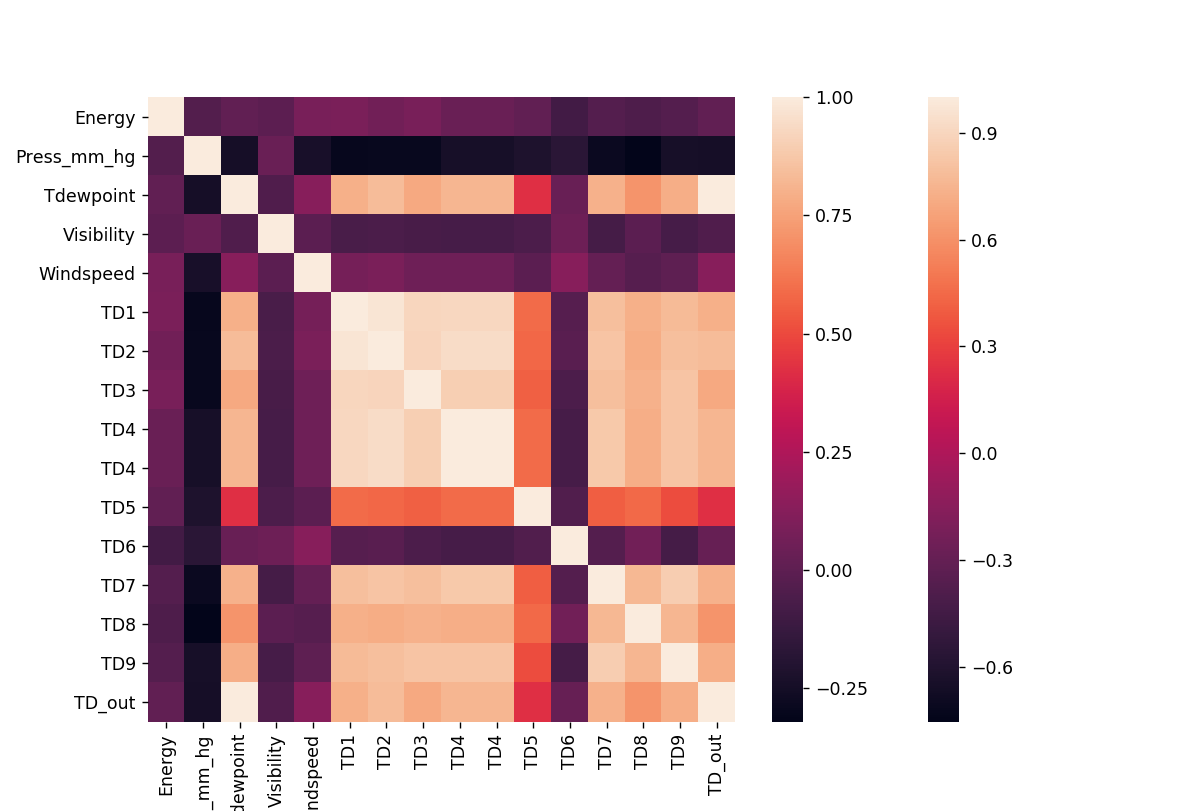

In [3]:
sns.heatmap(df_train.corr())

In [60]:
print(train_x.shape)
print(df_test.shape)

(15780, 15)
(15780, 15)


In [ ]:
train_x.isnull().sum()

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.25, random_state=42)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.columns)

(11835, 15)
(3945, 15)
(11835, 1)
(3945, 1)
Index(['Press_mm_hg', 'Tdewpoint', 'Visibility', 'Windspeed', 'TD1', 'TD2',
       'TD3', 'TD4', 'TD4', 'TD5', 'TD6', 'TD7', 'TD8', 'TD9', 'TD_out'],
      dtype='object')


In [65]:
model = RandomForestRegressor(n_jobs=-1)

In [67]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A col

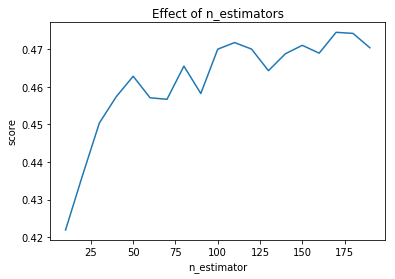

In [68]:
%matplotlib inline
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [69]:
scores

[0.42191424853230375,
 0.4363836439884621,
 0.4503822640611921,
 0.45738004383128605,
 0.4628159466184707,
 0.4570868465676329,
 0.4566805706264178,
 0.4655077374305276,
 0.45821847879989475,
 0.47001135947361056,
 0.4717705952068478,
 0.4700401745628837,
 0.4642968369337035,
 0.46879567218480367,
 0.4710402566699627,
 0.4689514253942765,
 0.4744936565418309,
 0.47421542898559943,
 0.470384138958777]

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
scores

In [71]:
model.set_params(n_estimators=170)
#scaler.fit(train_x)
#train_x = scaler.transform(train_x)
#df_test = scaler.transform(df_test)
model.fit(train_x, train_y)
print(model.score(train_x,train_y))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.9370068352784091


In [80]:
df_test = df_test.drop(['Observation'],axis=1)
df_test = df_test.drop(['Energy'],axis=1)

In [81]:
df_Energy = model.predict(df_test)
df_test.shape

(3945, 15)

In [82]:
df_Energy

array([ 59.58823529,  90.05882353,  67.58823529, ...,  85.64705882,
        79.58823529, 204.35294118])

In [103]:
df_submit = pd.read_csv("sample_submission.csv")
df_submit.dtypes
df_Energy.shape
df_submit.shape

(3945, 2)

In [104]:
df_submit['Energy'] = df_Energy

In [105]:
df_submit.to_csv("sample_submission.csv",index=False)

In [86]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

In [99]:
params = {'n_estimators': 100, 'max_depth':20 ,
          'learning_rate': 0.01,loss}
clf = ensemble.GradientBoostingRegressor(**params)
t1 = time.time()
clf.fit(train_x, train_y)
t2 = time.time()
print(t2-t1)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % math.sqrt(mse))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


110.01201128959656
MSE: 37.7472


In [100]:
clf.score(X_test,y_test)

0.8521203363091463

In [101]:
df_Energy = clf.predict(df_test)

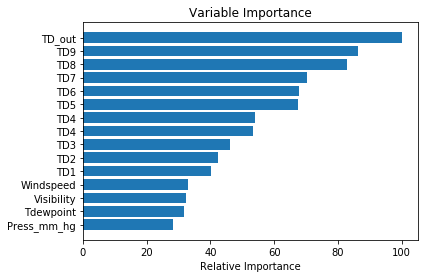

In [102]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, list(X_train))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
X_train.head(1)

In [15]:
import math

In [ ]:


td = 243.04*(math.log(RH/100)+((17.625*T)/(243.04+T)))/(17.625-math.log(RH/100)-((17.625*T)/(243.04+T)))
print(td)

In [37]:
def tdew_cal(RH, T):
    td = 243.04*(math.log(RH/100)+((17.625*T)/(243.04+T)))/(17.625-math.log(RH/100)-((17.625*T)/(243.04+T)))
    return(td)

In [38]:
all_data = df_train.append(df_test, ignore_index=True)

In [39]:
for i in range(1,10):
    T= 'T' + str(i)
    RH = 'RH_' + str(i)
    all_data['TD' + str(i)] = all_data[[T, RH]].apply(lambda x: tdew_cal(x[RH], x[T]), axis=1)

In [40]:
all_data.columns

Index(['Energy', 'Observation', 'Press_mm_hg', 'RH_1', 'RH_2', 'RH_3', 'RH_4',
       'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'RH_out', 'T1', 'T2', 'T3',
       'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out', 'Tdewpoint', 'Visibility',
       'Windspeed', 'TD1', 'TD2', 'TD3', 'TD4', 'TD5', 'TD6', 'TD7', 'TD8',
       'TD9'],
      dtype='object')

In [41]:
pd.set_option('display.max_columns', None)

In [42]:
all_data.head(10)

,Energy,Observation,Press_mm_hg,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out,Tdewpoint,Visibility,Windspeed,TD1,TD2,TD3,TD4,TD5,TD6,TD7,TD8,TD9
0,70.0,1111,760.050000,37.200000,38.000000,37.290000,34.942857,42.826667,9.633333,35.754000,45.360000,38.663333,62.000000,22.700000,21.000000,23.390000,22.832857,20.500000,12.533333,22.060,22.700000,20.200000,12.80,5.65,28.0,3.500000,7.340203,6.138518,7.988195,6.544549,7.432278,-18.775955,6.195704,10.276687,5.675577
1,210.0,1112,764.166667,41.045000,39.133333,39.526667,34.126667,44.663333,11.926667,25.133333,34.663333,37.933333,48.166667,21.500000,20.500000,22.926667,21.700000,18.633333,10.190000,20.790,22.926667,19.730000,8.47,-1.92,26.5,8.000000,7.710131,6.118357,8.433868,5.205494,6.353780,-18.087598,0.108819,6.510395,4.981933
2,50.0,1113,757.600000,38.000000,35.700000,36.590000,35.530000,46.200000,21.533333,33.663333,38.545000,39.430000,57.000000,21.666667,22.600000,21.890000,22.000000,19.000000,10.360000,19.600,21.890000,19.790000,10.60,2.40,27.0,2.000000,6.732165,6.650949,6.380654,6.051604,7.180269,-10.741584,3.164514,7.138898,5.592584
3,50.0,1114,760.600000,38.530000,38.000000,36.200000,35.090000,43.625714,9.590000,32.790000,38.600000,36.194286,63.000000,23.290000,21.671429,24.290000,23.100000,22.042857,10.390000,23.390,24.890000,22.600000,11.60,4.67,40.0,1.000000,8.381225,6.736405,8.348561,6.841186,9.099575,-20.480154,6.110506,9.833721,6.851243
4,250.0,1115,756.983333,42.560000,34.356000,40.333333,40.900000,49.090000,1.000000,38.208750,44.230000,44.090000,63.000000,24.000000,26.830000,26.530000,24.500000,21.500000,20.290000,23.365,23.390000,22.600000,17.70,10.40,21.5,1.000000,10.497938,9.810647,11.959134,10.350868,10.365162,-37.810402,8.324503,10.524384,9.761428
5,180.0,1116,749.400000,43.363333,42.433333,42.500000,41.663333,55.360000,93.066667,40.060000,47.600000,46.000000,97.000000,18.390000,17.700000,19.290000,18.600000,17.200000,3.100000,17.700,18.500000,16.700000,1.70,1.25,32.5,3.833333,5.705334,4.769393,6.227935,5.318225,8.175344,2.087909,3.947008,7.159829,5.019912
6,100.0,1117,756.300000,36.060000,34.634000,33.590000,34.700000,80.110000,1.000000,29.792500,37.626667,34.880000,61.666667,24.500000,24.434000,24.600000,24.890000,24.465714,12.233333,24.290,25.356667,23.405714,9.43,2.40,40.0,5.000000,8.477016,7.824494,7.521120,8.253640,20.811554,-42.737331,5.507100,9.867445,7.023013
7,60.0,1118,765.950000,34.863333,35.223333,36.090000,33.933333,53.260000,10.600000,31.496000,39.363333,37.200000,68.166667,23.000000,21.000000,23.000000,22.633333,21.390000,5.660000,21.500,24.100000,20.318571,8.00,2.33,40.0,1.000000,6.658667,5.043518,7.163013,5.943720,11.491370,-23.010418,3.882529,9.420934,5.225017
8,50.0,1119,760.600000,35.000000,31.856667,35.290000,33.200000,38.363333,1.000000,28.500000,37.863333,36.700000,38.000000,23.100000,23.390000,23.000000,23.000000,20.856667,21.290000,22.790,21.666667,20.290000,18.60,4.05,40.0,4.500000,6.803757,5.692734,6.835844,5.949134,6.148729,-37.203504,3.578611,6.679703,5.005109
9,100.0,1120,748.833333,37.200000,40.656667,37.260000,34.463333,78.800000,48.400000,31.290000,38.123333,35.590000,72.666667,21.000000,18.500000,20.390000,21.600000,20.093333,3.730000,18.000,21.000000,17.290000,4.67,0.20,40.0,3.666667,5.830486,4.876677,5.311694,5.258775,16.297731,-6.172183,0.739421,6.185495,1.910563


In [43]:
all_data['TD_out'] = all_data[['T_out', 'RH_out']].apply(lambda x: tdew_cal(x['RH_out'], x['T_out']), axis=1)

In [44]:
all_data.head(10)

,Energy,Observation,Press_mm_hg,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out,Tdewpoint,Visibility,Windspeed,TD1,TD2,TD3,TD4,TD5,TD6,TD7,TD8,TD9,TD_out
0,70.0,1111,760.050000,37.200000,38.000000,37.290000,34.942857,42.826667,9.633333,35.754000,45.360000,38.663333,62.000000,22.700000,21.000000,23.390000,22.832857,20.500000,12.533333,22.060,22.700000,20.200000,12.80,5.65,28.0,3.500000,7.340203,6.138518,7.988195,6.544549,7.432278,-18.775955,6.195704,10.276687,5.675577,5.698263
1,210.0,1112,764.166667,41.045000,39.133333,39.526667,34.126667,44.663333,11.926667,25.133333,34.663333,37.933333,48.166667,21.500000,20.500000,22.926667,21.700000,18.633333,10.190000,20.790,22.926667,19.730000,8.47,-1.92,26.5,8.000000,7.710131,6.118357,8.433868,5.205494,6.353780,-18.087598,0.108819,6.510395,4.981933,-1.873953
2,50.0,1113,757.600000,38.000000,35.700000,36.590000,35.530000,46.200000,21.533333,33.663333,38.545000,39.430000,57.000000,21.666667,22.600000,21.890000,22.000000,19.000000,10.360000,19.600,21.890000,19.790000,10.60,2.40,27.0,2.000000,6.732165,6.650949,6.380654,6.051604,7.180269,-10.741584,3.164514,7.138898,5.592584,2.429719
3,50.0,1114,760.600000,38.530000,38.000000,36.200000,35.090000,43.625714,9.590000,32.790000,38.600000,36.194286,63.000000,23.290000,21.671429,24.290000,23.100000,22.042857,10.390000,23.390,24.890000,22.600000,11.60,4.67,40.0,1.000000,8.381225,6.736405,8.348561,6.841186,9.099575,-20.480154,6.110506,9.833721,6.851243,4.793024
4,250.0,1115,756.983333,42.560000,34.356000,40.333333,40.900000,49.090000,1.000000,38.208750,44.230000,44.090000,63.000000,24.000000,26.830000,26.530000,24.500000,21.500000,20.290000,23.365,23.390000,22.600000,17.70,10.40,21.5,1.000000,10.497938,9.810647,11.959134,10.350868,10.365162,-37.810402,8.324503,10.524384,9.761428,10.567558
5,180.0,1116,749.400000,43.363333,42.433333,42.500000,41.663333,55.360000,93.066667,40.060000,47.600000,46.000000,97.000000,18.390000,17.700000,19.290000,18.600000,17.200000,3.100000,17.700,18.500000,16.700000,1.70,1.25,32.5,3.833333,5.705334,4.769393,6.227935,5.318225,8.175344,2.087909,3.947008,7.159829,5.019912,1.274826
6,100.0,1117,756.300000,36.060000,34.634000,33.590000,34.700000,80.110000,1.000000,29.792500,37.626667,34.880000,61.666667,24.500000,24.434000,24.600000,24.890000,24.465714,12.233333,24.290,25.356667,23.405714,9.43,2.40,40.0,5.000000,8.477016,7.824494,7.521120,8.253640,20.811554,-42.737331,5.507100,9.867445,7.023013,2.435735
7,60.0,1118,765.950000,34.863333,35.223333,36.090000,33.933333,53.260000,10.600000,31.496000,39.363333,37.200000,68.166667,23.000000,21.000000,23.000000,22.633333,21.390000,5.660000,21.500,24.100000,20.318571,8.00,2.33,40.0,1.000000,6.658667,5.043518,7.163013,5.943720,11.491370,-23.010418,3.882529,9.420934,5.225017,2.485892
8,50.0,1119,760.600000,35.000000,31.856667,35.290000,33.200000,38.363333,1.000000,28.500000,37.863333,36.700000,38.000000,23.100000,23.390000,23.000000,23.000000,20.856667,21.290000,22.790,21.666667,20.290000,18.60,4.05,40.0,4.500000,6.803757,5.692734,6.835844,5.949134,6.148729,-37.203504,3.578611,6.679703,5.005109,3.999988
9,100.0,1120,748.833333,37.200000,40.656667,37.260000,34.463333,78.800000,48.400000,31.290000,38.123333,35.590000,72.666667,21.000000,18.500000,20.390000,21.600000,20.093333,3.730000,18.000,21.000000,17.290000,4.67,0.20,40.0,3.666667,5.830486,4.876677,5.311694,5.258775,16.297731,-6.172183,0.739421,6.185495,1.910563,0.179275


In [45]:
train = all_data[0: df_train.shape[0]]
test = all_data[df_train.shape[0] : ]

In [46]:
train.shape

(15780, 36)

In [47]:
test.shape

(3945, 36)

In [48]:
train.head(10)

,Energy,Observation,Press_mm_hg,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out,Tdewpoint,Visibility,Windspeed,TD1,TD2,TD3,TD4,TD5,TD6,TD7,TD8,TD9,TD_out
0,70.0,1111,760.050000,37.200000,38.000000,37.290000,34.942857,42.826667,9.633333,35.754000,45.360000,38.663333,62.000000,22.700000,21.000000,23.390000,22.832857,20.500000,12.533333,22.060,22.700000,20.200000,12.80,5.65,28.0,3.500000,7.340203,6.138518,7.988195,6.544549,7.432278,-18.775955,6.195704,10.276687,5.675577,5.698263
1,210.0,1112,764.166667,41.045000,39.133333,39.526667,34.126667,44.663333,11.926667,25.133333,34.663333,37.933333,48.166667,21.500000,20.500000,22.926667,21.700000,18.633333,10.190000,20.790,22.926667,19.730000,8.47,-1.92,26.5,8.000000,7.710131,6.118357,8.433868,5.205494,6.353780,-18.087598,0.108819,6.510395,4.981933,-1.873953
2,50.0,1113,757.600000,38.000000,35.700000,36.590000,35.530000,46.200000,21.533333,33.663333,38.545000,39.430000,57.000000,21.666667,22.600000,21.890000,22.000000,19.000000,10.360000,19.600,21.890000,19.790000,10.60,2.40,27.0,2.000000,6.732165,6.650949,6.380654,6.051604,7.180269,-10.741584,3.164514,7.138898,5.592584,2.429719
3,50.0,1114,760.600000,38.530000,38.000000,36.200000,35.090000,43.625714,9.590000,32.790000,38.600000,36.194286,63.000000,23.290000,21.671429,24.290000,23.100000,22.042857,10.390000,23.390,24.890000,22.600000,11.60,4.67,40.0,1.000000,8.381225,6.736405,8.348561,6.841186,9.099575,-20.480154,6.110506,9.833721,6.851243,4.793024
4,250.0,1115,756.983333,42.560000,34.356000,40.333333,40.900000,49.090000,1.000000,38.208750,44.230000,44.090000,63.000000,24.000000,26.830000,26.530000,24.500000,21.500000,20.290000,23.365,23.390000,22.600000,17.70,10.40,21.5,1.000000,10.497938,9.810647,11.959134,10.350868,10.365162,-37.810402,8.324503,10.524384,9.761428,10.567558
5,180.0,1116,749.400000,43.363333,42.433333,42.500000,41.663333,55.360000,93.066667,40.060000,47.600000,46.000000,97.000000,18.390000,17.700000,19.290000,18.600000,17.200000,3.100000,17.700,18.500000,16.700000,1.70,1.25,32.5,3.833333,5.705334,4.769393,6.227935,5.318225,8.175344,2.087909,3.947008,7.159829,5.019912,1.274826
6,100.0,1117,756.300000,36.060000,34.634000,33.590000,34.700000,80.110000,1.000000,29.792500,37.626667,34.880000,61.666667,24.500000,24.434000,24.600000,24.890000,24.465714,12.233333,24.290,25.356667,23.405714,9.43,2.40,40.0,5.000000,8.477016,7.824494,7.521120,8.253640,20.811554,-42.737331,5.507100,9.867445,7.023013,2.435735
7,60.0,1118,765.950000,34.863333,35.223333,36.090000,33.933333,53.260000,10.600000,31.496000,39.363333,37.200000,68.166667,23.000000,21.000000,23.000000,22.633333,21.390000,5.660000,21.500,24.100000,20.318571,8.00,2.33,40.0,1.000000,6.658667,5.043518,7.163013,5.943720,11.491370,-23.010418,3.882529,9.420934,5.225017,2.485892
8,50.0,1119,760.600000,35.000000,31.856667,35.290000,33.200000,38.363333,1.000000,28.500000,37.863333,36.700000,38.000000,23.100000,23.390000,23.000000,23.000000,20.856667,21.290000,22.790,21.666667,20.290000,18.60,4.05,40.0,4.500000,6.803757,5.692734,6.835844,5.949134,6.148729,-37.203504,3.578611,6.679703,5.005109,3.999988
9,100.0,1120,748.833333,37.200000,40.656667,37.260000,34.463333,78.800000,48.400000,31.290000,38.123333,35.590000,72.666667,21.000000,18.500000,20.390000,21.600000,20.093333,3.730000,18.000,21.000000,17.290000,4.67,0.20,40.0,3.666667,5.830486,4.876677,5.311694,5.258775,16.297731,-6.172183,0.739421,6.185495,1.910563,0.179275


In [49]:
test.head(10)

,Energy,Observation,Press_mm_hg,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out,Tdewpoint,Visibility,Windspeed,TD1,TD2,TD3,TD4,TD5,TD6,TD7,TD8,TD9,TD_out
15780,NaN,50001,733.633333,39.900000,41.260000,40.700000,41.200000,52.080000,92.500000,38.610556,47.090000,44.900000,98.166667,21.100000,19.290000,21.500000,18.89,18.088889,3.200000,19.200000,21.600000,18.100000,2.70,2.43,34.833333,2.000000,6.937303,5.799165,7.586294,5.418247,8.101029,2.101377,4.763113,9.834464,5.945744,2.439422
15781,NaN,50002,756.666667,39.030000,40.463333,38.290000,36.700000,43.666667,45.256667,35.290000,39.266667,37.500000,82.000000,22.600000,20.790000,22.290000,20.29,20.760000,7.690000,20.500000,23.760000,19.390000,7.27,4.40,40.000000,2.000000,7.955705,6.863872,7.398340,5.005109,7.952460,-3.429371,4.629147,9.080760,4.514524,4.400572
15782,NaN,50003,751.250000,35.590000,34.900000,35.833333,33.090000,45.700000,25.466667,26.478000,34.126667,39.790000,50.000000,21.000000,19.790000,21.166667,20.39,18.000000,7.190000,21.100000,22.600000,18.200000,6.05,-3.70,34.500000,6.500000,5.192399,3.843759,5.437874,3.614387,6.110500,-11.324426,1.095141,5.996672,4.298988,-3.600945
15783,NaN,50004,758.716667,37.590000,35.700000,37.000000,35.326667,45.400000,32.663333,30.926667,36.966667,41.290000,58.333333,20.566667,20.566667,20.166667,22.00,17.700000,8.960000,19.790000,20.666667,18.000000,9.35,1.48,25.166667,1.000000,5.595900,4.853623,5.012561,5.968499,5.741993,-6.603460,2.135811,5.443603,4.648550,1.581350
15784,NaN,50005,758.850000,38.700000,42.030000,38.900000,39.000000,48.826667,65.263333,33.790000,45.326667,43.200000,95.000000,21.500000,18.566667,22.500000,20.00,19.633333,2.966667,20.200000,23.390000,20.133333,3.03,2.25,60.333333,2.000000,6.849580,5.414395,7.817402,5.622118,8.572301,-2.918175,3.745081,10.892537,7.227896,2.307075
15785,NaN,50006,759.866667,37.126667,39.090000,37.790000,35.000000,43.290000,13.333333,36.356000,43.560000,40.200000,66.666667,22.290000,20.150000,23.500000,22.70,20.390000,10.066667,22.000000,22.463333,20.323333,9.97,4.00,32.666667,4.000000,6.947405,5.789477,8.282087,6.451210,7.490487,-16.861244,6.384936,9.457524,6.350294,4.052426
15786,NaN,50007,762.300000,39.500000,37.463333,36.500000,35.400000,40.826667,1.533333,27.700000,35.863333,33.266667,53.333333,21.890000,20.790000,22.500000,22.60,20.290000,10.823333,20.600000,22.390000,20.463333,11.20,1.97,40.000000,5.333333,7.497015,5.745796,6.885335,6.528186,6.545147,-39.557015,1.295139,6.531757,3.754366,2.055648
15787,NaN,50008,756.600000,38.863333,39.090000,40.700000,37.863333,66.182857,82.665556,33.205556,43.590000,39.090000,87.500000,20.533333,19.390000,20.200000,20.50,17.600000,-5.674444,18.000000,20.150000,16.890000,-4.70,-6.45,64.500000,1.000000,6.047830,5.110043,6.419146,5.641144,11.214591,-8.152227,1.566564,7.374464,2.873553,-6.457744
15788,NaN,50009,760.933333,39.230000,38.833333,37.500000,39.200000,44.060000,68.290000,33.663333,42.000000,39.163333,90.500000,21.390000,21.860000,21.926667,20.50,19.890000,7.793333,20.133333,23.290000,20.390000,5.37,3.88,62.166667,1.833333,6.949714,7.221063,6.770530,6.143028,7.295882,2.313602,3.633127,9.660227,6.031131,3.940305
15789,NaN,50010,754.833333,44.700000,44.530000,45.000000,47.000000,51.790000,99.900000,43.009444,54.560000,49.290000,94.000000,18.963333,18.200000,20.000000,16.50,16.700000,8.300000,16.862222,18.500000,16.390000,8.33,7.42,28.500000,11.000000,6.665462,5.916865,7.705060,5.146356,6.734740,8.285246,4.204827,9.170192,5.731195,7.420581


In [50]:
tdew_cal(37.2,22.7)

7.340203159483693

In [51]:
all_data.columns

Index(['Energy', 'Observation', 'Press_mm_hg', 'RH_1', 'RH_2', 'RH_3', 'RH_4',
       'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'RH_out', 'T1', 'T2', 'T3',
       'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out', 'Tdewpoint', 'Visibility',
       'Windspeed', 'TD1', 'TD2', 'TD3', 'TD4', 'TD5', 'TD6', 'TD7', 'TD8',
       'TD9', 'TD_out'],
      dtype='object')

In [52]:
features = ['Energy','Press_mm_hg','Tdewpoint','Visibility','Windspeed','TD1','TD2','TD3','TD4','TD4','TD5','TD6','TD7','TD8','TD9','TD_out']

<IPython.core.display.Javascript object>


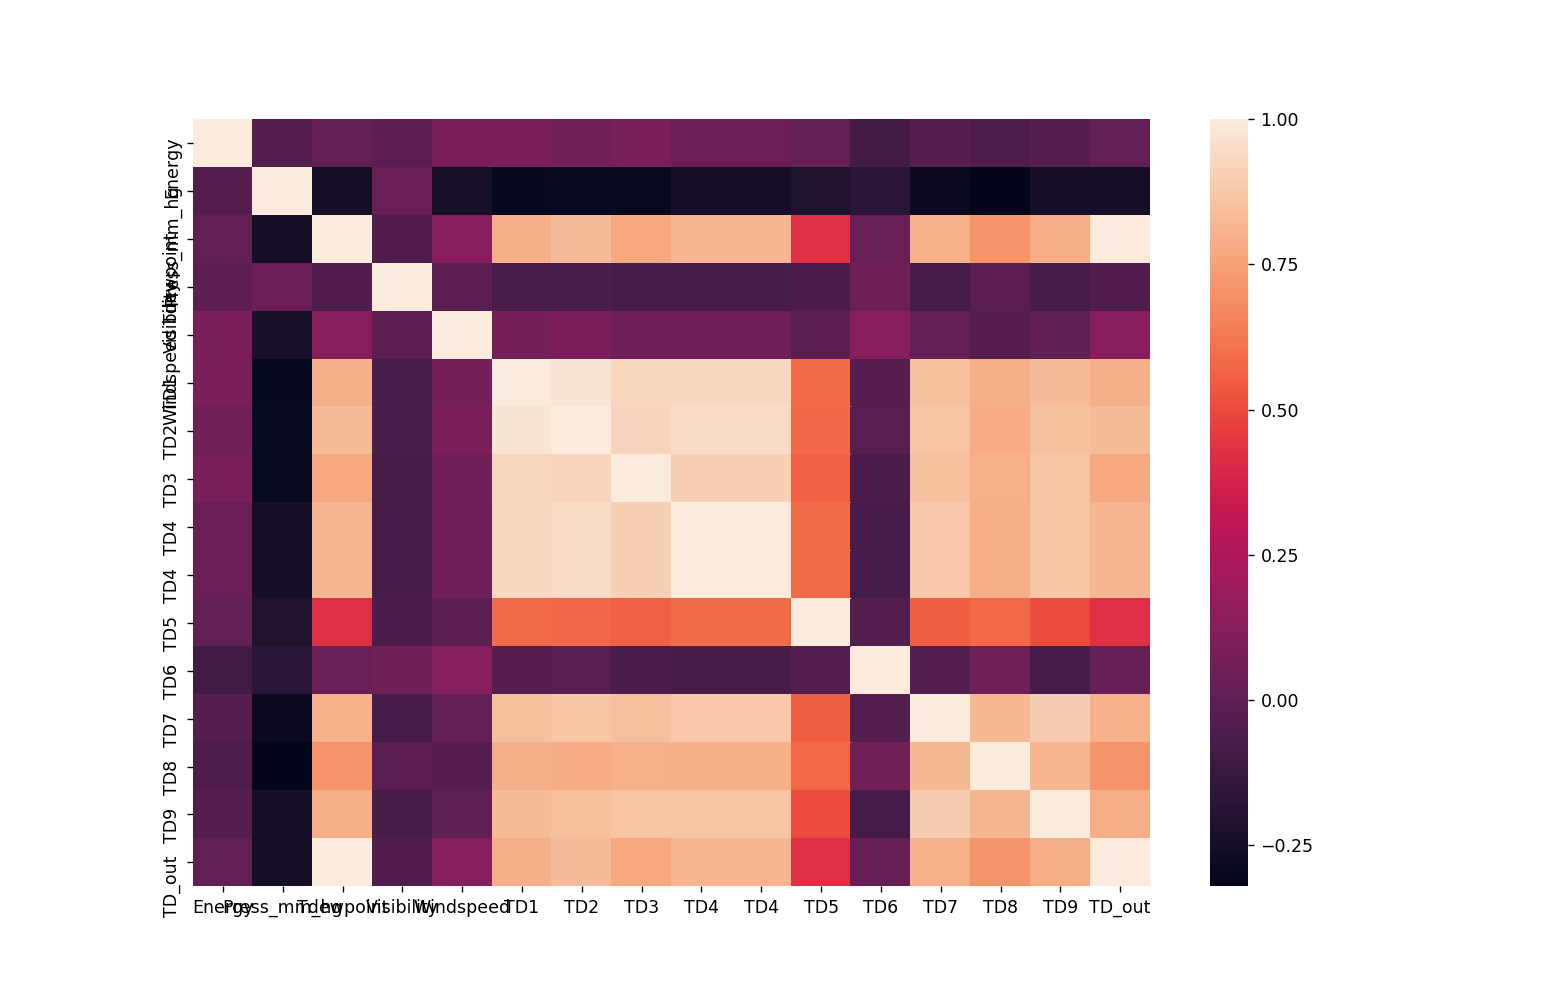

In [54]:
sns.heatmap(train[features].corr())